<a href="https://colab.research.google.com/github/dtht2d/deep-learning/blob/main/codes/deep-neural-net/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%autosave 30

Autosaving every 30 seconds


# **Classify ECG Signals Using Long Short-Term Memory Networks**

MATLAB example “Classify ECG Signals Using Long Short-Term Memory Networks” (https://www.mathworks.com/help/signal/ug/classify-ecg-signals-using-long-short-term-memory-networks.html Links to an external site.), up to “Improve the Performance with Feature Extraction”, and execute the code. 
# **Objective**
- Python code
- Change the network (e.g. number of bi-LSTM units) and training parameters to see if we can get better results than the default settings presented in the example.
- Compare the results of at least two of your variants with the default setup. 

# **I. Background**
[Understanding LSTM and its diagrams](https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714)

[Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

[Understanding LSTM - 
a tutorial into Long Short-Term Memory
Recurrent Neural Networks](https://arxiv.org/pdf/1909.09586.pdf)
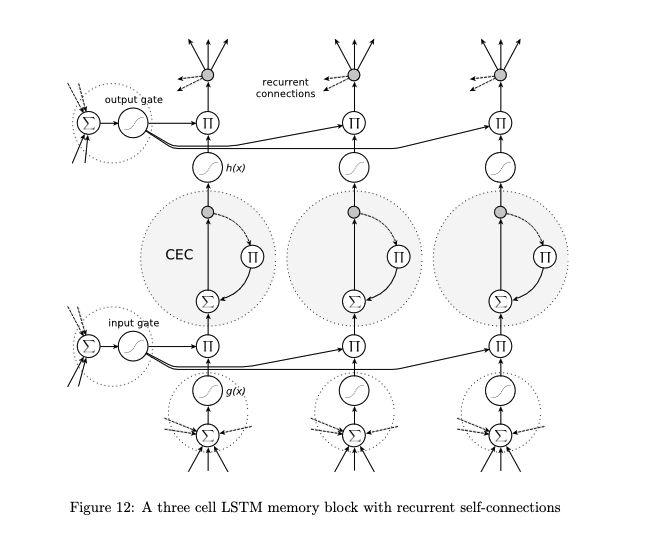
### **Summary**
A Long Short-Term Memory (LSTM) network is a type of recurrent neural network (RNN)

Approach (the hybrid learning) designed to capture long-term dependencies in sequential data. It uses memory units with gating mechanisms to regulate the flow of information. 
Methods: 
- **input gate** controls the storage of new information, the forget gate determines which old information to discard
- **output gate** controls the exposure of information to the network. 

Pro: LSTMs address the limitations of traditional RNNs by allowing the network to remember important information over longer periods, making them effective in tasks involving sequential, time dependency data such as speech recognition, language translation, etc.



# **II. Methods**

### Install library

In [5]:
!pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 7.1 MB/s eta 0:00:00


## **1. Dataset**

[Open database physiological signal and clinical data for research purpose](https://physionet.org/about/database/)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load a specific record from Long Term AF Database instead
https://physionet.org/content/ltafdb/1.0.0/


In [88]:
import wfdb
#Load Long Term AF Database
record_list = wfdb.get_record_list('ltafdb', records='all')

#Choose the firt record
record_name =record_list[0]

# Load the ECG record
record = wfdb.rdrecord(record_name, pn_dir='ltafdb')
annotation = wfdb.rdann(record_name, 'atr', pn_dir='ltafdb')

# Extract the ECG signal and the annotation labels
ecg_signal = record.p_signal.flatten()
labels = annotation.symbol
# Print the available classes in the dataset
classes = set(labels)

In [89]:
print (ecg_signal.shape)
print (classes)

(19322880,)
{'V', 'N', '"', '+', 'A'}


**"** (Quotation Mark): This label is often used to indicate a non-beat annotation or an unclear or uncertain annotation. It signifies that the specific annotation is not classified as a normal beat or any other abnormality.

**+** (Plus Sign): This label is typically used to indicate paced beats. Paced beats occur when the heart's electrical activity is artificially stimulated by a pacemaker device.

**A** (Atrial Fibrillation): Atrial Fibrillation (AF) is a common type of cardiac arrhythmia characterized by irregular and rapid electrical impulses in the atria of the heart.

**N** (Normal Beat): This label is used to indicate normal or sinus beats, which represent the normal electrical activity of the heart.

**V** (Premature Ventricular Contraction): Premature Ventricular Contraction (PVC) is an abnormal heartbeat that occurs when the ventricles of the heart contract earlier than expected.

Count the occurent of each labels

In [74]:
from collections import Counter
label_counts = Counter(labels)
# Print the label counts
for label, count in label_counts.items():
    print(f"Label '{label}' occurs {count} times")

Label '+' occurs 89 times
Label 'N' occurs 105416 times
Label 'A' occurs 53 times
Label 'V' occurs 778 times
Label '"' occurs 1 times


## Plotting

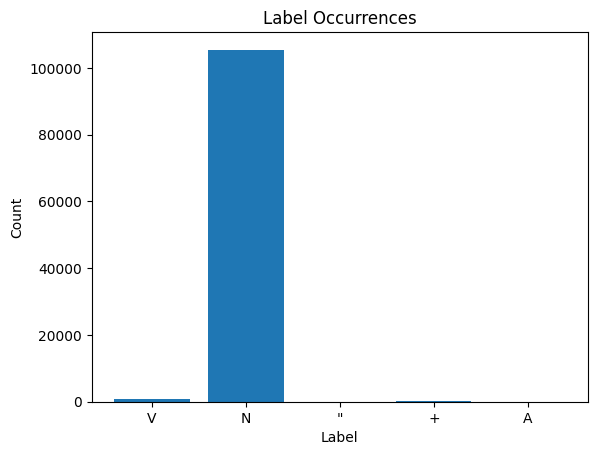

In [75]:
import matplotlib.pyplot as plt
# Create a histogram of label occurrences
label_counts = {label: 0 for label in classes}
for label in labels:
    label_counts[label] += 1

# Plot the histogram
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Occurrences')
plt.show()

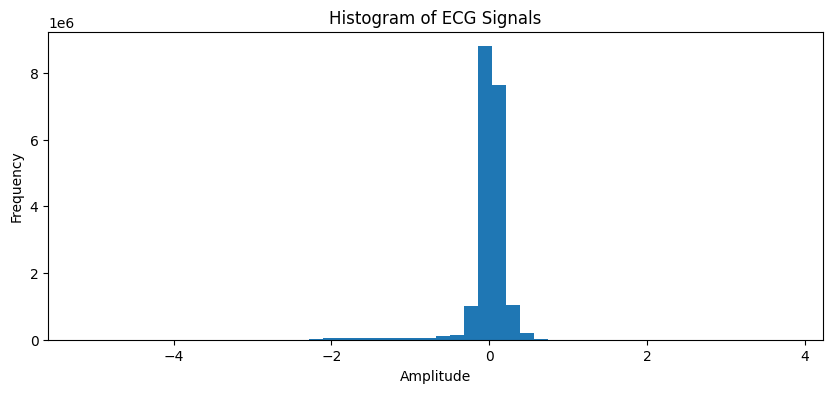

In [64]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(10, 4))
plt.hist(ecg_signal, bins=50)
plt.title('Histogram of ECG Signals')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()

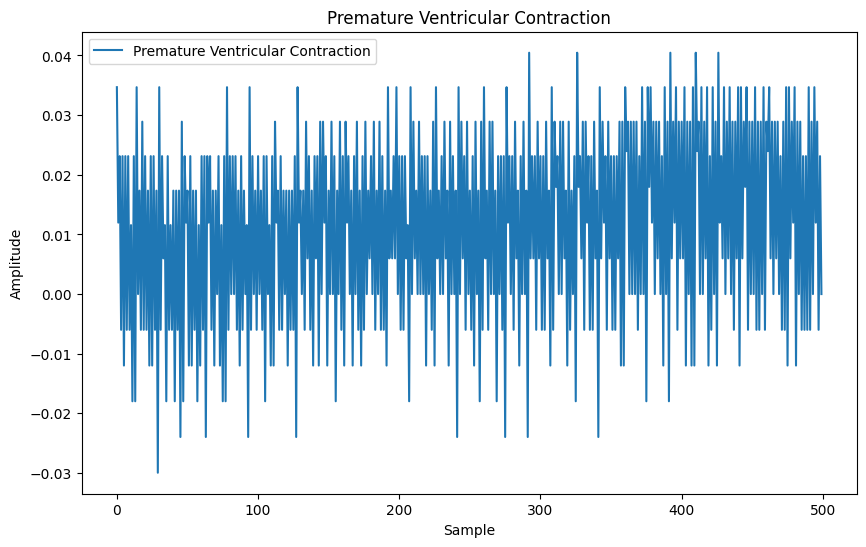

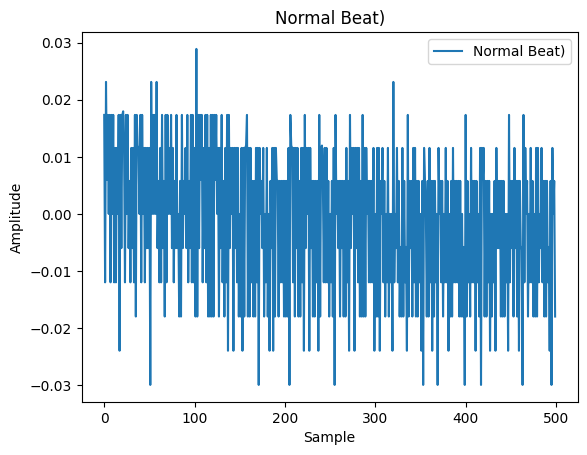

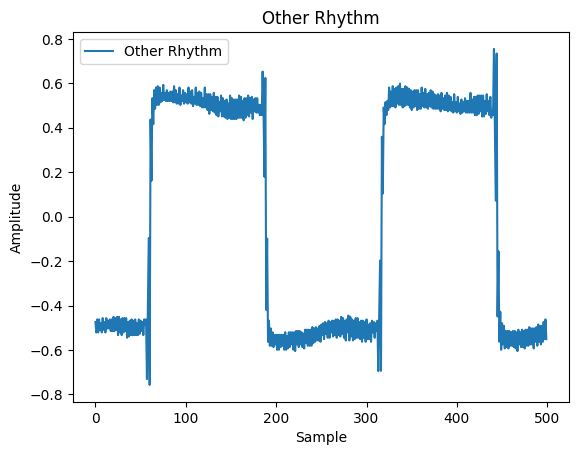

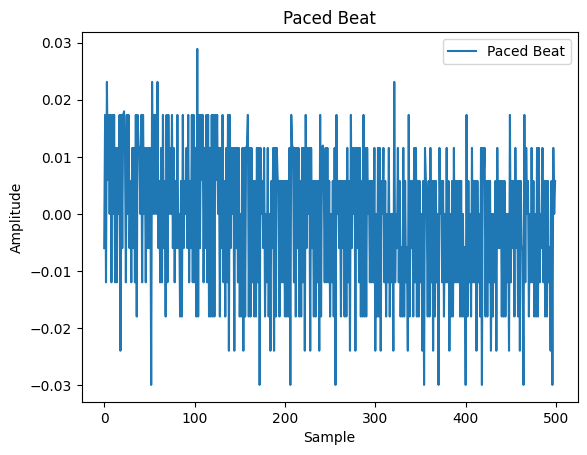

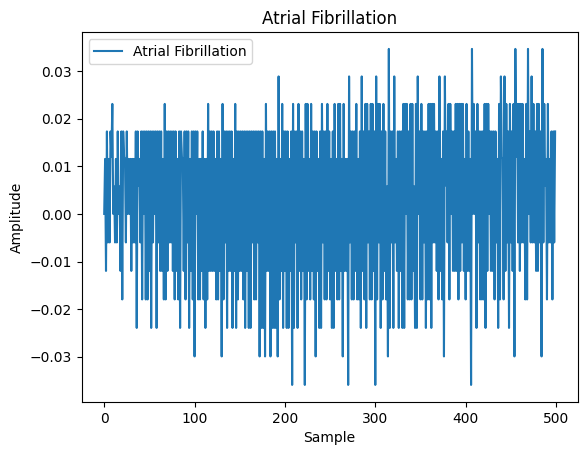

In [96]:
# Plot a segment from each class
plt.figure(figsize=(10, 6))
# Assign names to the class labels
class_names = {
    'N': 'Normal Beat)',
    'A': 'Atrial Fibrillation',
    '"': 'Other Rhythm',
    '+': 'Paced Beat',
    'V': 'Premature Ventricular Contraction'
}
for class_label in classes:
    # Find the indices of the samples belonging to the current class
    class_indices = [i for i in range(len(labels)) if labels[i] == class_label]

    # Take the first segment from the class
    segment_start = class_indices[0]
    segment_end = segment_start + 500  # Define the segment length

    # Plot the segment for the current class
    plt.plot(ecg_signal[segment_start:segment_end], label=class_names[class_label])

    # Set the title and axis labels for the current class
    plt.title(class_names[class_label])
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # Display the legend
    plt.legend()

    # Show the plot for the current class
    plt.show()